24
26
30


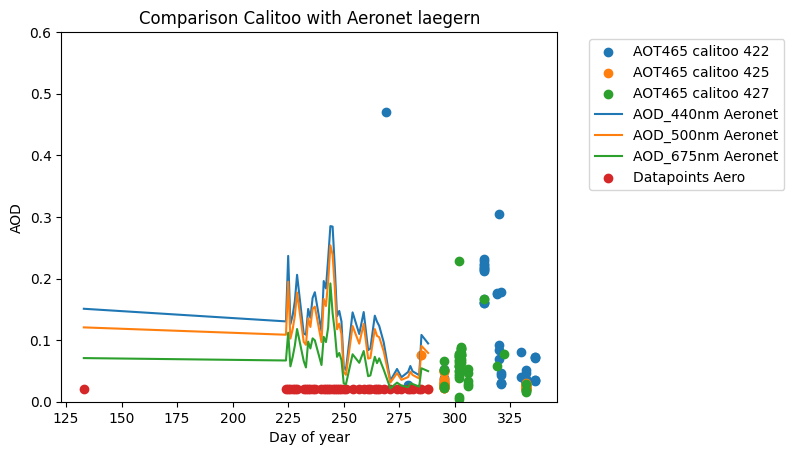

,time,MOD08_D3_6_1_Aerosol_Optical_Depth_Land_Ocean_Mean,MYD08_D3_6_1_Aerosol_Optical_Depth_Land_Ocean_Mean,MOD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean,MYD08_D3_6_1_Aerosol_Optical_Depth_Land_Ocean_Mean,mean_OMAEROe_003_AerosolOpticalThicknessMW_483_5,OMAERUVd_003_FinalAerosolAbsOpticalDepth500,OMAERUVd_003_FinalAerosolOpticalDepth500
0,2024-08-01,0.374,0.503,0.205,0.503,NaN,NaN,NaN
1,2024-08-02,0.153,0.169,0.117,0.169,NaN,NaN,NaN
2,2024-08-03,NaN,0.313,NaN,0.313,0.738695,NaN,NaN
3,2024-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-05,0.011,0.034,0.156,0.034,NaN,0.0078,0.1191
...,...,...,...,...,...,...,...,...
117,2024-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2024-11-27,NaN,NaN,0.042,NaN,NaN,NaN,NaN
119,2024-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2024-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


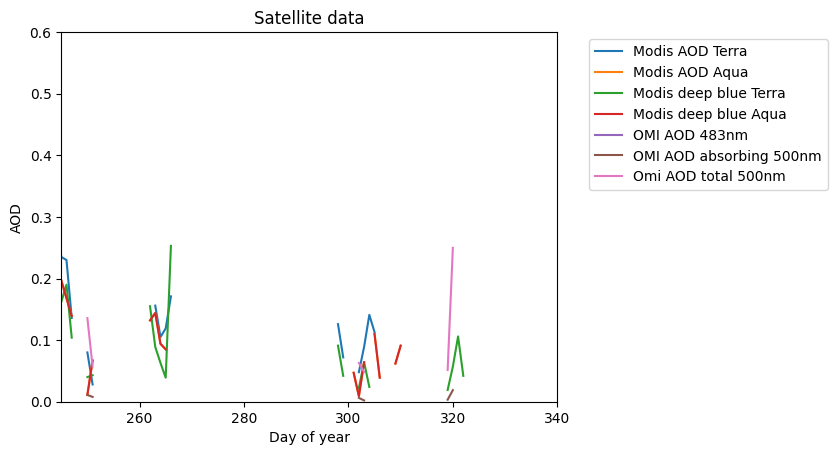

True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from satellite_and_aeronet import calitoo, aeronet, satelite
from IPython.display import display 

filenames = [r'calibrated_data/preprocessed_data_with_AOD_all_calitoo_422.csv', r'calibrated_data/preprocessed_data_with_AOD_all_calitoo_425.csv',r'calibrated_data/preprocessed_data_with_AOD_all_calitoo_427.csv']
columns_with_commas = ['Elevation', 'AOT465', 'AOT540', 'AOT619', 'Alpha', 'RÂ²']
columns_to_numbers = ['Temperature', 'Pression', 'RAW465', 'RAW540', 'RAW619','Elevation', 'AOT465', 'AOT540', 'AOT619', 'Alpha', 'RÂ²']
calitoo_list = ['422', '425', '427']

locations = ['laegern', 'payerne']
coord_threshold = [4700,800,4770,870] # lat0, long0, lat1, long1

alpha_threshold = 2
r_threshold = 0.8
aot_threshold = 0.8

def plot_calitoo(dataframe, calitoo_number):
    wavelengths_cal = ['AOT465'] #, 'AOT540', 'AOT619'
    for wavelength in wavelengths_cal:
        plt.scatter(dataframe['Date'].dt.dayofyear, dataframe[wavelength].where(dataframe[wavelength]<0.5), label=f'{wavelength} calitoo {calitoo_list[calitoo_number]}')
    #plt.scatter(dataframe['Date'].dt.dayofyear, np.full((dataframe.shape[0],), 0.02), label='Datapoints cal')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Day of year')
    plt.ylabel('AOD')
    plt.title('Calitoo')
    plt.ylim([0,0.6])


for index, filename in enumerate(filenames):
    data = pd.read_csv(filenames[index], skiprows=0, delimiter=',')
    data = data.replace('-.--', np.nan)

    for column in columns_to_numbers:
        data[column] = pd.to_numeric(data[column])
    
    data['Latitude'] = pd.to_numeric(data['Latitude'].str.replace('N', ''), errors='coerce')
    data['Longitude'] = pd.to_numeric(data['Longitude'].str.replace('E', ''), errors='coerce')
    data['Altitude'] = pd.to_numeric(data['Altitude'].str.replace('E', ''), errors='coerce')
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
    data['Time'] = data['Time'].str.replace('.', '0')
    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S',  errors='coerce').dt.time
    
    filtered_data = data[
        # Latitude condition (between lat0 and lat1)
        (data['Latitude'] >= coord_threshold[0]) & 
        (data['Latitude'] <= coord_threshold[2]) & 
        
        # Longitude condition (between long0 and long1)
        (data['Longitude'] >= coord_threshold[1]) & 
        (data['Longitude'] <= coord_threshold[3]) & 
        
        # Alpha threshold condition 
        (data['Alpha'] <= alpha_threshold) & 
        
        # R² threshold condition
        (data['RÂ²'] >= r_threshold)&

        (data['AOT465']< aot_threshold)&
        (data['AOT540']< aot_threshold)&
        (data['AOT540']< aot_threshold)
    ]
    print(data.isna().sum().sum())



    plot_calitoo(filtered_data, index)
    #display(filtered_data)

aeronet(locations[0])
satelite(245,340)
1==1

In [2]:
file_path = os.path.join(folder_path, filename)
        
        # Check if it's a file (not a subdirectory)
        if os.path.isfile(file_path):
            print(filename)

IndentationError: unexpected indent (2592306274.py, line 4)

In [ ]:
data